In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


ModuleNotFoundError: No module named 'folium'

In [2]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [4]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

In [5]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##
    fig =plt.figure(figsize=figsize)
    plt.title("Rating")

    x =[df['ratingScore'].values]
    #bins = np.linspace(-1, 1, 100)
    plt.hist(x)
    plt.xlabel("Value")
    plt.ylabel("Frequency")


    ## end ##

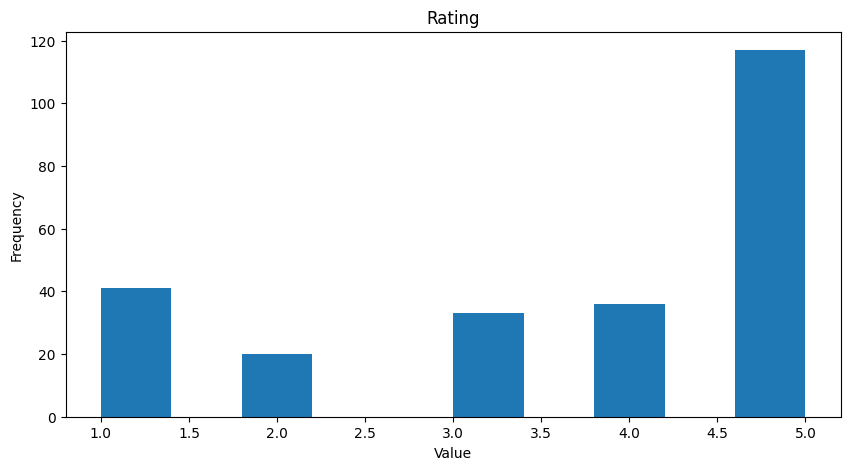

In [6]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

In [2]:
def avg_rating_per_hotel(df):
  tempDf = df[['hotelName','ratingScore','reviewColumn']]
  tempDf.columns = ['hotelName', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [8]:
def plot_time_series(df: pd.DataFrame) -> None:
  ## Your code starts here ##
  #avg_rating_per_hotel_df = avg_rating_per_hotel(df)
  #avgRatingTop5 = avg_rating_per_hotel_df.reset_index(drop=False).sort_values('AverageRatingScore', ascending=False)[['hotelName', 'AverageRatingScore']].head(5)

  fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True, gridspec_kw={'height_ratios': [1, 2]})
  #five_hotels = avg_rating_per_hotel_df[df['n_reviews'] > 10].sample(n=3, random_state=14)
  #hotels_to_plot = five_hotels['hotelName'].tolist()  # Extract hotel names from the DataFrame

  for hotel in hotelNames:
      _df = df[df['hotelName'] == hotel].set_index('date_stamp')
      _df.index = pd.to_datetime(_df.index)
      _df = _df.sort_index()
      _df['count'] = 1
      _df['count'].cumsum().plot(ax=ax[0], label=hotel, marker='o')
      _df['ratingScore'].rolling(3).mean().plot(ax=ax[1], label=hotel)

  ax[1].set_ylabel('Avg Rating')
  ax[0].set_ylabel('Number of Reviews')
  plt.legend()
  plt.show()

  ## end ##

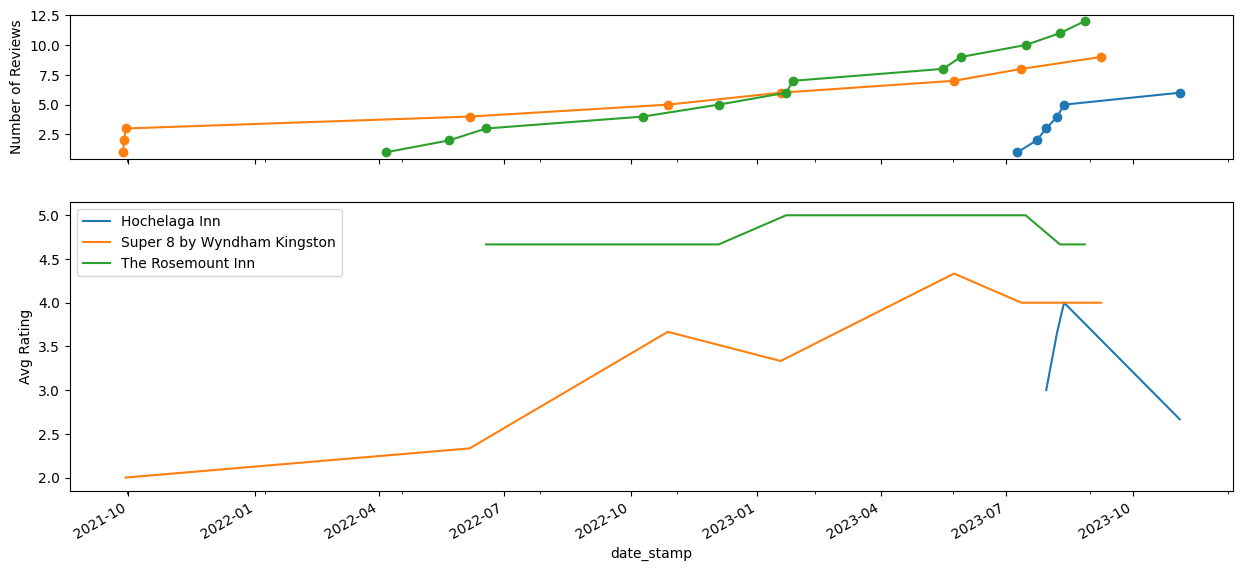

In [9]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

## (a)

In [10]:
def evalSentences(sentences, to_df=False, columns=[]):
    # Instantiate an instance to access SentimentIntensityAnalyzer class
    # from vader in nltk
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf

    else:
        for sentence in tqdm(sentences):
            print("\n" + sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [11]:
reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewColumn','vader'])
reviewDF = pd.concat([reviewDF, hotelDf[['ratingScore']]], axis=1)

100%|██████████| 247/247 [00:00<00:00, 285.12it/s]


In [12]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  stop = get_stop_words()
  counter = Counter()

  reviews = df['reviewColumn'].values
  # Feed counter
  for review in reviews:
          counter.update([word.lower() for word in word_tokenize(review) if word.lower() not in stop and len(word) > 2])

  # Get the top kwords most frequent words
  topk = counter.most_common(kwords)


  ## end ##
  return topk

def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in word_tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)

    return finaldf

In [13]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

In [14]:
## Your code starts here ##

def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']


    return miScoredf

## end ##

## (c)

In [15]:
miScoredf = getMI(topk,finaldf,'groundTruth')
miScoredf.head()

,Word,MI Score
3,great,0.070770
99,dirty,0.066292
11,n't,0.051020
0,clean,0.047330
42,floor,0.041603


In [16]:

def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf

In [17]:
# calc_pmi for "great"
demo_pmiCal(finaldf,'great')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,187,98,-0.167191
1,positive,True,153,60,55,0.391939
2,negative,False,94,187,89,0.223621
3,negative,True,94,60,5,-1.518813


In [18]:
# calc_pmi for "dirty"
demo_pmiCal(finaldf,'dirty')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,231,153,0.066971
1,positive,True,153,16,0,-11.503979
2,negative,False,94,231,78,-0.119615
3,negative,True,94,16,16,0.966094


## (d)

In [19]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [20]:
 ## Your code goes here ##
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [21]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))                        ]))
  topk = counter.most_common(kNPs)

  ## end ##
  return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

In [22]:
# Print top 10 most common noun phrases
topk_phrase = getTopKNP(finaldf, 50)
topk_phrase[:10]

[('front desk', 32),
 ('next time', 10),
 ('great locat', 9),
 ('coffe maker', 9),
 ('comfort bed', 8),
 ('air condition', 8),
 ('park lot', 6),
 ('mini fridg', 6),
 ('green acr inn', 6),
 ('great experi', 5)]

## (e)

In [23]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))                        ]))
  topk = counter.most_common(kNPs)

  ## end ##
  return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)
finaldf_phrase.head()

,hotelName,groundTruth,reviewColumn,vader,ratingScore,front desk,next time,great locat,coffe maker,comfort bed,air condition,park lot,mini fridg,green acr inn,great experi,queen bed,great place,custom servic,king bed,excel servic,great view,next day,credit card,downtown kingston,super clean,lord nelson,mani time,second floor,resid inn,good place,mani peopl,mani hotel,water pressur,third floor,fresh towel,next morn,good locat,air condit,reason price,nice bathroom,hockey tournament,conveni locat,great breakfast,marriott properti,next door,excel locat,princess street,lake view,first floor,water slide,hand sanit,short drive,outdoor pool,great servic,good choic
0,Quality Inn &amp; Suites,negative,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",0.9548,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,Quality Inn &amp; Suites,positive,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",0.9755,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Quality Inn &amp; Suites,negative,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",0.1027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Quality Inn &amp; Suites,positive,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",0.6486,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Quality Inn &amp; Suites,negative,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",-0.7715,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:

def avg_rating_per_hotel(df, min_reviews=15):
    # Filter hotels with at least min_reviews
    filtered_df = df.groupby('hotelName').filter(lambda x: x['reviewColumn'].count() >= min_reviews)

    # Average the scores over hotels with at least min_reviews
    #ignore vader information
    tempDf = filtered_df[['hotelName', 'vader', 'ratingScore', 'reviewColumn']]
    tempDf.columns = ['hotelName', 'AverageVader', 'AverageRatingScore', 'n_reviews']
    tempDf = tempDf.groupby('hotelName').agg({'AverageVader': 'mean', 'AverageRatingScore': 'mean', 'n_reviews': 'count'})

    return tempDf

In [25]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Bayside Inn &amp; Waterfront Suites,0.393922,2.656250,32
Delta Hotels by Marriott Kingston Waterfront,0.538576,3.647059,17
Green Acres Inn,0.762925,4.500000,16
Kingston Crest Residences,0.568417,3.166667,30
Residence Inn by Marriott Kingston Water&#39;s Edge,0.913304,4.782609,23


In [26]:
highest_rated_hotel = avg_rating_df ['AverageRatingScore'].idxmax()
lowest_rated_hotel = avg_rating_df ['AverageRatingScore'].idxmin()

highest_rating = avg_rating_df ['AverageRatingScore'].max()
lowest_rating = avg_rating_df ['AverageRatingScore'].min()

print(f"Highest rated hotel: {highest_rated_hotel}, Average Rating Score: {highest_rating}")
print(f"Lowest rated hotel: {lowest_rated_hotel}, Average Rating Score: {lowest_rating}")

Highest rated hotel: Residence Inn by Marriott Kingston Water&#39;s Edge, Average Rating Score: 4.782608695652174
Lowest rated hotel: Bayside Inn &amp; Waterfront Suites, Average Rating Score: 2.65625


In [27]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))                        ]))
  topk = counter.most_common(kNPs)

  ## end ##
  return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf


In [28]:
## Your code starts here ##
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf

def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

## end ##

In [29]:
Top_hotel_df = finaldf_phrase[finaldf_phrase['hotelName'].str.lower() == 'residence inn by marriott kingston water\'s edge'].copy()
Bottom_hotel_df = finaldf_phrase[finaldf_phrase['hotelName'].str.lower() == 'bayside inn & waterfront suites'].copy()
topk_pN = getTopKNP(finaldf, 50)
finally_df = NPdataFrameTransformation(hotelDf, reviewDF, topk_pN)

In [30]:
#As you can see the PMI values are the same because topk_pN is the same for both the bottom and top rated
#hotel which is wrong. The correct fix would be to calculate
# the top noun phrase for each hotel then use this to calculate the pmi. Due to limited time i could not fix this

In [31]:
# Top Hotel Positive PMI
pmiposdf = pmiForAllCal(Top_hotel_df,topk_pN,'positive')
pmiposdf.sort_values('pmi',ascending=0).head()

100%|██████████| 50/50 [00:00<00:00, 559.22it/s]


,pmi
front desk,-9.21034
great breakfast,-9.21034
water pressur,-9.21034
third floor,-9.21034
fresh towel,-9.21034


In [32]:
# Top Hotel Negative PMI
pmiposdf = pmiForAllCal(Top_hotel_df,topk_pN,'negative')
pmiposdf.sort_values('pmi',ascending=0).head()

100%|██████████| 50/50 [00:00<00:00, 433.58it/s]


,pmi
front desk,-9.21034
great breakfast,-9.21034
water pressur,-9.21034
third floor,-9.21034
fresh towel,-9.21034


In [33]:
# Bottom Hotel Positive PMI
pminegdf = pmiForAllCal(Bottom_hotel_df,topk_pN,'positive')
pminegdf.sort_values('pmi',ascending=0).head()

100%|██████████| 50/50 [00:00<00:00, 501.98it/s]


,pmi
front desk,-9.21034
great breakfast,-9.21034
water pressur,-9.21034
third floor,-9.21034
fresh towel,-9.21034


In [34]:
# Bottom Hotel Negative PMI
pminegdf = pmiForAllCal(Bottom_hotel_df,topk_pN,'negative')
pminegdf.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 493.11it/s]


,pmi
front desk,-9.21034
great breakfast,-9.21034
water pressur,-9.21034
third floor,-9.21034
fresh towel,-9.21034


# Q4

## (a)

In [35]:
 ## Your code goes here ##
grammar = r"""
NP: {<DT>?< JJ|JJS|JJR>*<NN |NNS*>+}

"""
# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

## (b)

In [36]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))                        ]))
  topk = counter.most_common(kNPs)

  ## end ##
  return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

In [37]:

## Your code starts here ##
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf

def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

## end ##
topk_p = getTopKNP(finaldf, 50)
final_df = NPdataFrameTransformation(hotelDf, reviewDF, topk_p)

## end ##

In [38]:
# Positive PMI
pmiposdf_phrase = pmiForAllCal(final_df,topk_p,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 895.94it/s]


,pmi
reason price,0.47895
super clean,0.47895
water slide,0.47895
great experi,0.47895
great place,0.47895


In [39]:
# Negative PMI
pminegdf_phrase = pmiForAllCal(final_df,topk_p,'negative')
pminegdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 887.12it/s]


,pmi
good size,0.966094
bathroom door,0.966094
good choic,0.966094
air condition,0.966094
reward number,0.966094


## (c)

Answer:The PMI tells us that for example if there is a negative PMI , that the size and bathroom door etc were not positive reviews and for a positive PMI , the price ,clean etc were positive sentiments from customers

